In [69]:
import pandas as pd
import matplotlib as plt
import scipy.stats
%matplotlib inline 

In [54]:
df=pd.read_csv("WELLCOME_APCspend2013_forThinkful.csv", encoding ='latin1')

In [55]:
df.head(10)

,PMID_PMCID,Publisher,Journal_title,Article_title,COST,Cost_2
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00,0
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04,2381
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56,642
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64,669
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88,685
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20,2392
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95,2367
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33,649
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59,1294
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78,1294


In [56]:
df.Journal_title.unique()

array(['Psychological Medicine', 'Biomacromolecules', 'J Med Chem',
       'J Org Chem', 'Journal of Medicinal Chemistry',
       'Journal of Proteome Research', 'Mol Pharm',
       'ACS Chemical Biology',
       'Journal of Chemical Information and Modeling', 'Biochemistry',
       'Gastroenterology', 'Journal of Biological Chemistry',
       'Journal of Immunology', 'ACS Chemical Neuroscience', 'ACS NANO',
       'American Chemical Society', 'Analytical Chemistry',
       'Bioconjugate Chemistry', 'Journal of Medicinal Chemistry ',
       'Journal of the American Chemical Society', 'ACS Nano', 'CHEST',
       'Journal of Neurophysiology', 'Journal of Physiology',
       'The Journal of Neurophysiology', 'American Journal of Psychiatry',
       'Americal Journal of Psychiatry', 'Behavioral Neuroscience',
       'Emotion', 'Health Psychology', 'Journal of Abnormal Psychology',
       'Journal of Consulting and Clinical Psychology',
       'Journal of Experimental Psychology:  Animal Be

In [57]:
def category_mapper(title):
    if "Psychology" in title or "Psychological" in title or "Psychiatry" in title:
        return "Psychology"
    elif "Biology" in title or "Biological" in title:
        return "Biology"
    elif "Chemistry" in title or "Chemical" in title:
        return "Chemistry"
    elif "Medicine" in title or "Medical" in title:
        return "Medicine"
    else:
        return "Misc"



In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 6 columns):
PMID_PMCID       1928 non-null object
Publisher        2127 non-null object
Journal_title    2126 non-null object
Article_title    2127 non-null object
COST             2127 non-null object
Cost_2           2127 non-null int64
dtypes: int64(1), object(5)
memory usage: 99.8+ KB


In [59]:
df["Category"]=df.Journal_title.apply(lambda x: category_mapper(str(x)))

In [60]:
df["Cost"]=df.Cost_2.astype(int)

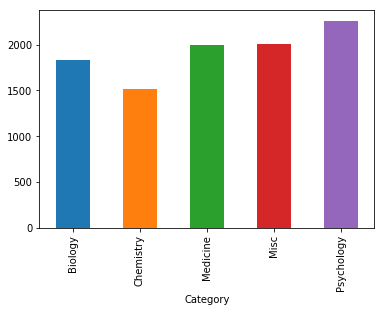

In [61]:
df.groupby("Category").Cost.mean().plot(kind="bar")

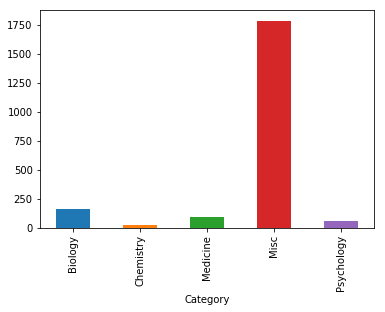

In [62]:
df.groupby("Category").Journal_title.count().plot(kind="bar")

In [66]:
a=df[df.Category=="Biology"].Cost.values

In [67]:
b=df[df.Category=="Psychology"].Cost.values

In [70]:
scipy.stats.ttest_ind(a, b)

Ttest_indResult(statistic=-2.340279805035327, pvalue=0.020177038897337508)

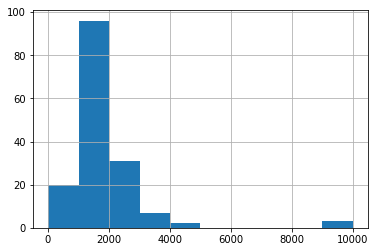

In [71]:
df[df.Category=="Biology"].Cost.hist()

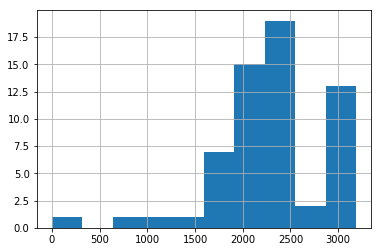

In [72]:
df[df.Category=="Psychology"].Cost.hist()